## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [22]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 

## Загружаем исходные данные

In [2]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [4]:
train_img.shape

(42000, 28, 28)

## Визуализируем исходные данные

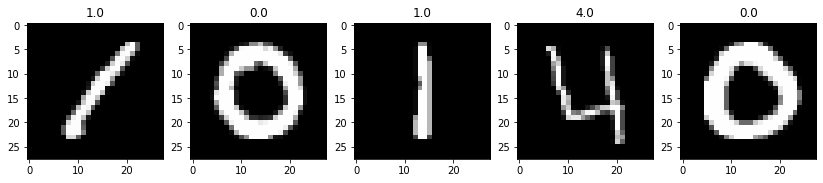

In [5]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Вычисляем гистограммы градиентов

In [27]:
winSize = (28,28)
blockSize = (14,14)
blockStride = (14,14)
cellSize = (7,7)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,
                        blockSize,
                        blockStride,
                        cellSize,
                        nbins,
                        derivAperture,
                        winSigma,
                        histogramNormType,
                        L2HysThreshold,
                        gammaCorrection,
                        nlevels)

In [38]:
train_hist = list()
for img in train_img:
    # HOG почему-то в массиве каждое отдельное значение гистограммы возвращает
    # поэтому я тут прохожусь по возвращаемому значению и записываю только значение
    distinct = list()
    for hist_val in hog.compute(img.astype(np.uint8)):
        distinct.append(hist_val[0])
    train_hist.append(distinct)

test_hist = list()
for img in test_img:
    distinct = list()
    for hist_val in hog.compute(img.astype(np.uint8)):
        distinct.append(hist_val[0])
    test_hist.append(distinct)

# Обучаем модель

In [39]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_hist, test_size=0.2,
    random_state=42)

In [41]:
model = LogisticRegression(max_iter=2000)
model.fit(x_train, y_train)
pred_val = model.predict(x_val)

## Оцениваем качество решение на валидационной выборке

In [42]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.9666666666666667


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       816
         1.0       0.98      0.99      0.98       909
         2.0       0.96      0.96      0.96       846
         3.0       0.97      0.96      0.97       937
         4.0       0.98      0.96      0.97       839
         5.0       0.99      0.97      0.98       702
         6.0       0.97      0.99      0.98       785
         7.0       0.96      0.95      0.96       893
         8.0       0.93      0.94      0.94       835
         9.0       0.95      0.96      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[803   2   4   1   0   0   4   1   1   0]
 [  0 897   3   1   1   0   0   2   5   0]
 [  1   6 815   6   2   1   0   5   9   1]
 [  2   0   5 901   0   6   0   7  14   2]
 [  0   0   2   0 807   0   6   4   7  13]
 [  0   1   1   5   1 679   7   0   7   1]
 [  2   2   0   0   1   1 776   0   3   0]
 [  2   1   9   2   3   0   0 852   3  21]
 [  9   3   5  11   3   2   5   4 787   6]
 [  6   1   1   3   6   0   0  12   6 803]]


## Предсказания на тестовых данных

In [45]:
pred_test = model.predict(test_hist)

## Визуализируем предсказания

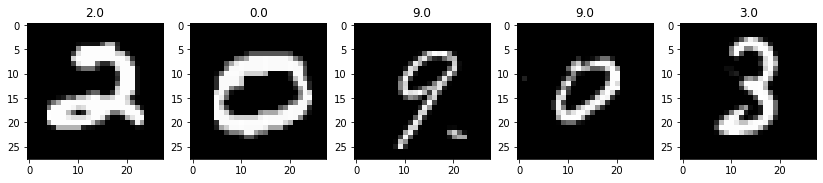

In [46]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

## Готовим файл для отправки

In [50]:
with open('submit.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [ ]:
!head submit.csv